Lendo arquivo: ../data/interim/enem_2023.parquet

Dimensões do dataset:
(2166843, 20)

Visualizando colunas:
['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO', 'TP_ESCOLA', 'Q001', 'Q002', 'Q006', 'Q022', 'Q024', 'Q025', 'IN_TREINEIRO', 'NOTA_MEDIA_5', 'Q001_ord', 'Q002_ord', 'Q006_ord', 'Q022_ord', 'Q024_ord', 'Q025_ord']

Resumo geral dos dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166843 entries, 0 to 2166842
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   NU_NOTA_MT       float64
 1   NU_NOTA_LC       float64
 2   NU_NOTA_CH       float64
 3   NU_NOTA_CN       float64
 4   NU_NOTA_REDACAO  float64
 5   TP_ESCOLA        int64  
 6   Q001             object 
 7   Q002             object 
 8   Q006             object 
 9   Q022             object 
 10  Q024             object 
 11  Q025             object 
 12  IN_TREINEIRO     int64  
 13  NOTA_MEDIA_5     float64
 14  Q001_ord         int64  
 1

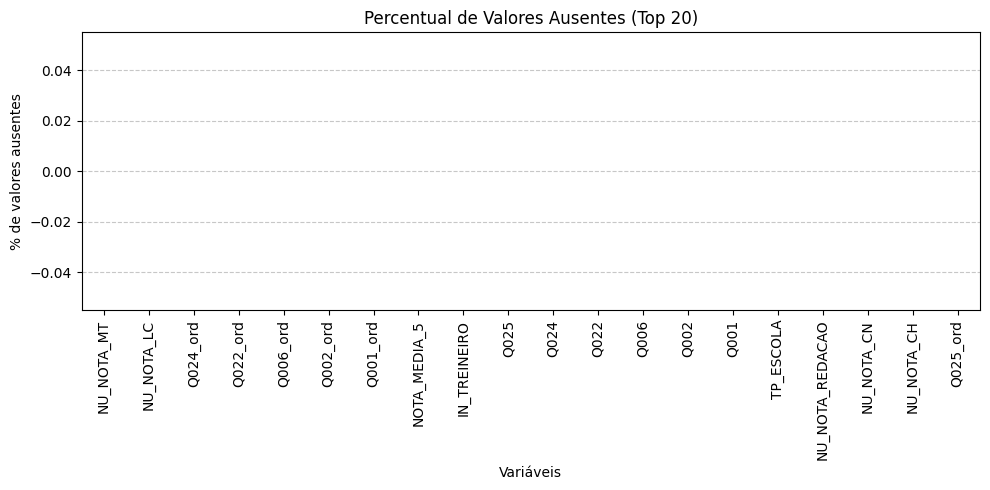


Estatísticas descritivas das principais variáveis numéricas:
                     count        mean         std  min     25%    50%  \
NU_NOTA_MT       2166843.0  532.231468  132.150883  0.0  428.60  519.7   
NU_NOTA_LC       2166843.0  520.493241   75.059079  0.0  472.90  524.5   
NU_NOTA_CH       2166843.0  527.010777   88.042461  0.0  470.60  533.3   
NU_NOTA_CN       2166843.0  496.953440   88.333266  0.0  440.50  494.0   
NU_NOTA_REDACAO  2166843.0  625.849395  208.859637  0.0  520.00  620.0   
TP_ESCOLA        2166843.0    1.587115    0.668354  1.0    1.00    1.0   
IN_TREINEIRO     2166843.0    0.000000    0.000000  0.0    0.00    0.0   
NOTA_MEDIA_5     2166843.0  540.507664   96.517445  0.0  474.28  537.7   
Q001_ord         2166843.0    4.481485    1.938454  1.0    3.00    5.0   
Q002_ord         2166843.0    4.657102    1.659928  1.0    3.00    5.0   
Q006_ord         2166843.0    4.550901    3.480531  1.0    2.00    3.0   
Q022_ord         2166843.0    3.517846    1.095482

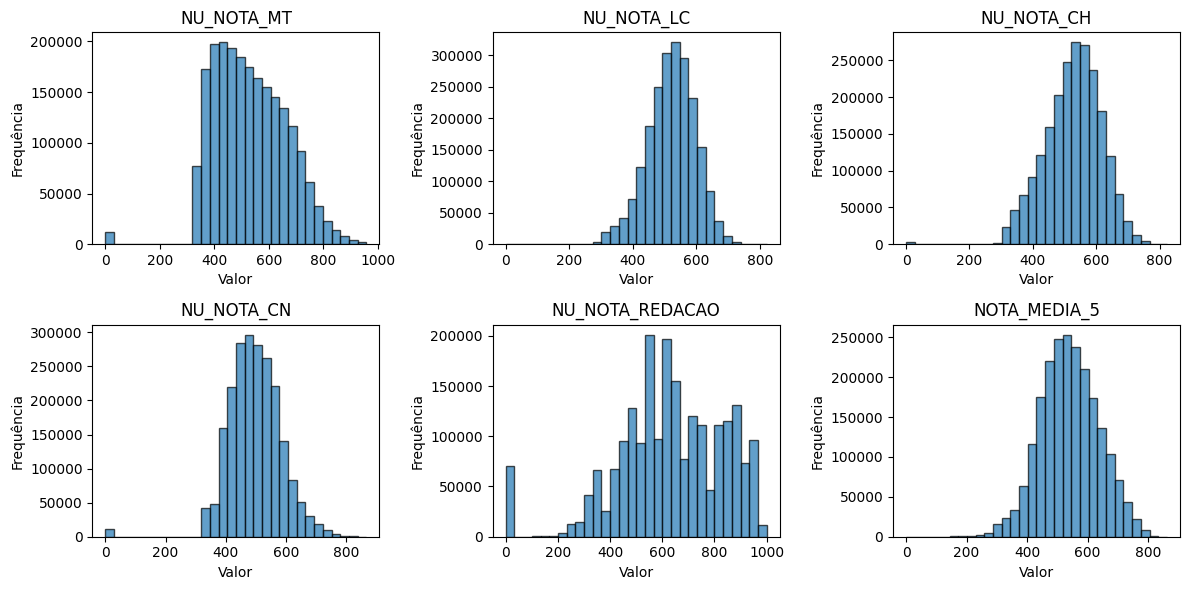

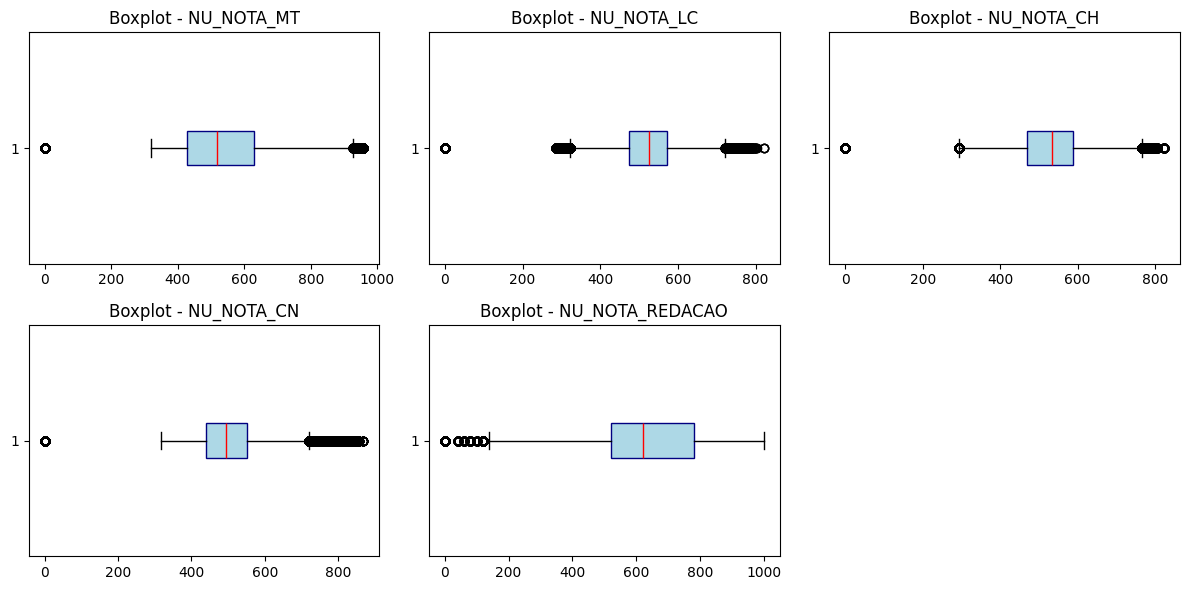


Registros duplicados: 0

Variáveis categóricas detectadas: 6

Cardinalidade (número de categorias únicas por coluna):
Q006    17
Q001     8
Q002     8
Q022     5
Q024     5
Q025     2
dtype: int64


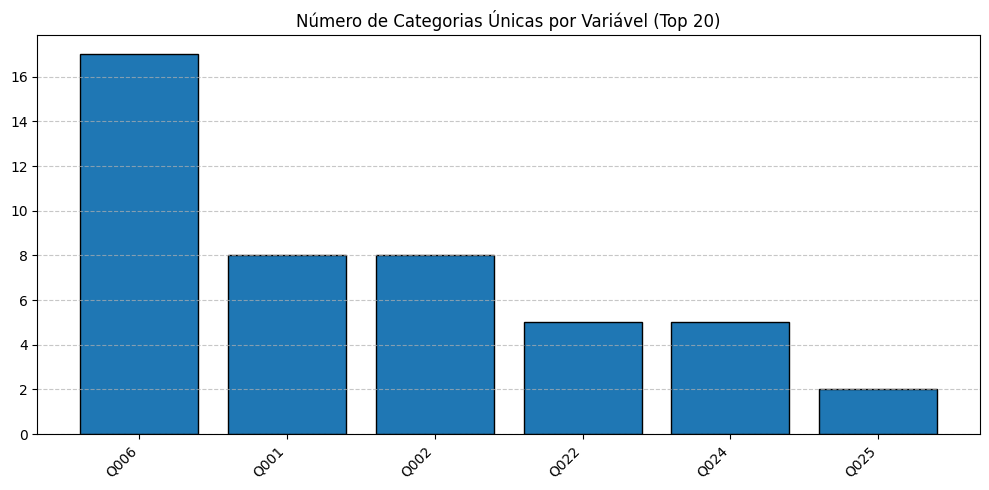


Conclusão:
- Dataset lido e convertido para Parquet com sucesso.
- Variáveis numéricas possuem distribuição coerente (0–1000).
- Alguns campos apresentam valores ausentes e alta cardinalidade.
- Próximos passos: tratamento de ausentes, exclusão de treineiros e análise bivariada.


In [3]:
# 00_data_quality_analysis.ipynb
# ---------------------------------------------
# Objetivo: Analisar a qualidade dos dados do ENEM 2023
# ---------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo parquet preparado
DATA_PATH = "../data/interim/enem_2023.parquet"

# Carrega o dataset
print(f"Lendo arquivo: {DATA_PATH}")
df = pd.read_parquet(DATA_PATH)

print("\nDimensões do dataset:")
print(df.shape)

print("\nVisualizando colunas:")
print(df.columns.tolist())

# ============================================================
# 1. Visão geral dos tipos de dados e valores ausentes
# ============================================================
print("\nResumo geral dos dados:")
print(df.info())

missing = df.isna().mean().sort_values(ascending=False)
print("\nTop 10 colunas com mais valores ausentes:")
print(missing.head(10))

plt.figure(figsize=(10,5))
missing.head(20).plot(kind='bar', color='tab:blue')
plt.title('Percentual de Valores Ausentes (Top 20)')
plt.ylabel('% de valores ausentes')
plt.xlabel('Variáveis')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ============================================================
# 2. Estatísticas descritivas básicas
# ============================================================
print("\nEstatísticas descritivas das principais variáveis numéricas:")
print(df.describe().T)

# ============================================================
# 3. Distribuição de notas
# ============================================================
notas = ["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_REDACAO", "NOTA_MEDIA_5"]

plt.figure(figsize=(12,6))
for i, col in enumerate(notas):
    plt.subplot(2,3,i+1)
    plt.hist(df[col].dropna(), bins=30, color='tab:blue', edgecolor='black', alpha=0.7)
    plt.title(col)
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# ============================================================
# 4. Detecção de outliers com Boxplots
# ============================================================
plt.figure(figsize=(12,6))
for i, col in enumerate(notas[:-1]):  # exceto media 5
    plt.subplot(2,3,i+1)
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='navy'),
                medianprops=dict(color='red'))
    plt.title(f"Boxplot - {col}")
plt.tight_layout()
plt.show()

# ============================================================
# 5. Verificação de duplicatas e consistência
# ============================================================
num_dupes = df.duplicated().sum()
print(f"\nRegistros duplicados: {num_dupes}")

# ============================================================
# 6. Análise de valores únicos em variáveis categóricas
# ============================================================
categoricas = df.select_dtypes(include=['object', 'category']).columns
print(f"\nVariáveis categóricas detectadas: {len(categoricas)}")

cardinalidade = df[categoricas].nunique().sort_values(ascending=False)
print("\nCardinalidade (número de categorias únicas por coluna):")
print(cardinalidade.head(15))

plt.figure(figsize=(10,5))
plt.bar(cardinalidade.head(20).index, cardinalidade.head(20).values, color='tab:blue', edgecolor='black')
plt.title('Número de Categorias Únicas por Variável (Top 20)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ============================================================
# 7. Conclusão preliminar
# ============================================================
print("\nConclusão:")
print("- Dataset lido e convertido para Parquet com sucesso.")
print("- Variáveis numéricas possuem distribuição coerente (0–1000).")
print("- Alguns campos apresentam valores ausentes e alta cardinalidade.")
print("- Próximos passos: tratamento de ausentes, exclusão de treineiros e análise bivariada.")